# New section

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
diabetes_data = pd.read_csv("/content/diabetes.csv")


In [7]:
diabetes_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#part a)  set a seed (to ensure work reproducibility) and take a random sample of  25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison
# Set a seed for reproducibility
np.random.seed(0)

In [9]:
# Taking a random sample of 25 observations
sample_data = diabetes_data.sample(25)


In [12]:
# Finding the mean and highest glucose values in the sample
mean_glucose_sample = sample_data['Glucose'].mean()
highest_glucose_sample = sample_data['Glucose'].max()

In [13]:
# Finding the mean and highest glucose values in the population
mean_glucose_population = diabetes_data['Glucose'].mean()
highest_glucose_population = diabetes_data['Glucose'].max()

In [14]:
# Preparing data for chart comparison
statistics = {
    'Mean Glucose': [mean_glucose_population, mean_glucose_sample],
    'Highest Glucose': [highest_glucose_population, highest_glucose_sample]
}
stats_df = pd.DataFrame(statistics, index=['Population', 'Sample'])

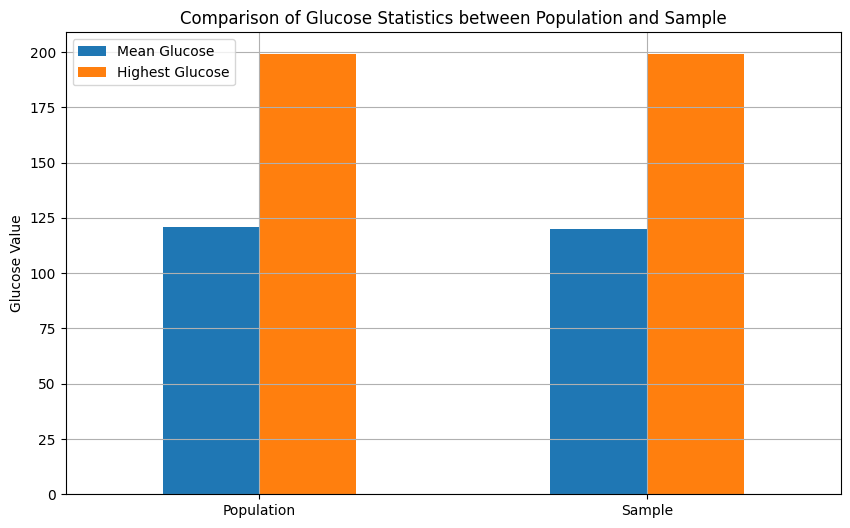

In [15]:
# Plotting the comparison
stats_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Glucose Statistics between Population and Sample')
plt.ylabel('Glucose Value')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


In [16]:
#part b) Find the 98th percentile of BMI of your sample and the population and compare the results using charts
# Calculating the 98th percentile of BMI for both the sample and the population
percentile_98_sample = np.percentile(sample_data['BMI'], 98)
percentile_98_population = np.percentile(diabetes_data['BMI'], 98)

In [17]:
# chart comparison
percentile_data = {
    '98th Percentile BMI': [percentile_98_population, percentile_98_sample]
}
percentile_df = pd.DataFrame(percentile_data, index=['Population', 'Sample'])

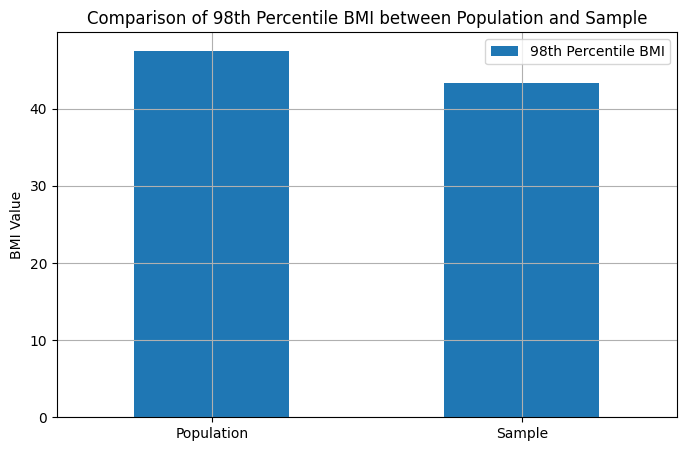

In [18]:
percentile_df.plot(kind='bar', figsize=(8, 5))
plt.title('Comparison of 98th Percentile BMI between Population and Sample')
plt.ylabel('BMI Value')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [19]:
# Returning the computed values for reference
percentile_98_sample, percentile_98_population

(43.264, 47.52599999999996)

In [22]:
#partc c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings.

# Setting parameters for bootstrap
n_samples = 500
sample_size = 150

In [20]:
# Bootstrap: Generating 500 samples of 150 observations each and calculating statistics
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

In [23]:
for _ in range(n_samples):
    bootstrap_sample = diabetes_data['BloodPressure'].sample(sample_size, replace=True)
    bootstrap_means.append(bootstrap_sample.mean())
    bootstrap_stds.append(bootstrap_sample.std())
    bootstrap_percentiles.append(np.percentile(bootstrap_sample, 50))  # 50th percentile (median)

In [24]:
# Calculating the average mean, standard deviation, and percentile for the bootstrap samples
average_mean_bootstrap = np.mean(bootstrap_means)
average_std_bootstrap = np.mean(bootstrap_stds)
average_percentile_bootstrap = np.mean(bootstrap_percentiles)


In [25]:
# Population statistics for BloodPressure
mean_bp_population = diabetes_data['BloodPressure'].mean()
std_bp_population = diabetes_data['BloodPressure'].std()
percentile_bp_population = np.percentile(diabetes_data['BloodPressure'], 50)  # 50th percentile (median)

In [26]:
# Preparing data for chart comparison
comparison_data = {
    'Mean BloodPressure': [mean_bp_population, average_mean_bootstrap],
    'Std BloodPressure': [std_bp_population, average_std_bootstrap],
    'Median BloodPressure': [percentile_bp_population, average_percentile_bootstrap]
}
comparison_df = pd.DataFrame(comparison_data, index=['Population', 'Bootstrap Average'])

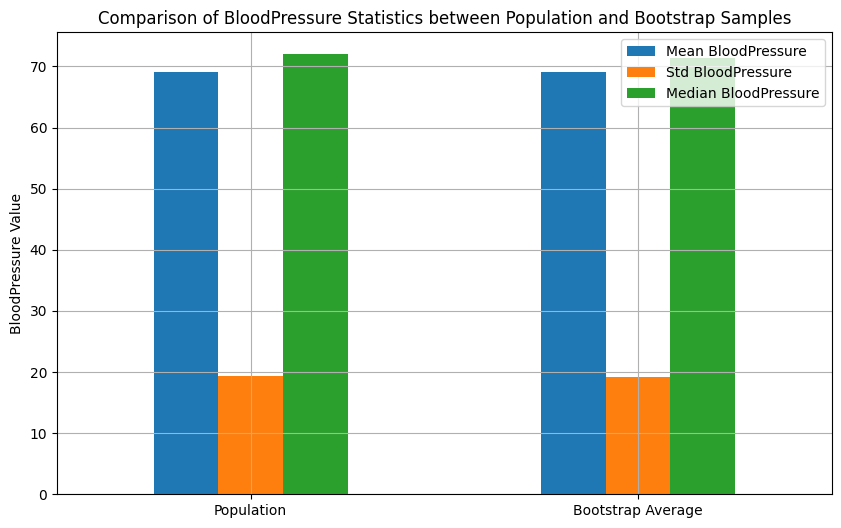

In [27]:
# Plotting the comparison
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of BloodPressure Statistics between Population and Bootstrap Samples')
plt.ylabel('BloodPressure Value')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [28]:
diabetes_data.to_csv('result.csv')
